In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv('euro2024.csv')
df.head(5)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [32]:
# analisar o tipo de dados da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [33]:
# renomear colunas 

df.rename(columns={
    "Name":"Nome",
    "Position":"Posição",
    "Age":"Idade",
    "Club":"Clube",
    "Height":"Altura",
    "Foot":"Chute",
    "Caps":"Atuações",
    "Goals":"Gols",    
    "MarketValue":"Valor de Mercado",
    "Country":"País"
}, inplace=True)
df.head()

,Nome,Posição,Idade,Clube,Altura,Chute,Atuações,Gols,Valor de Mercado,País
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [34]:
# verificar valores nulos
df.isnull().sum()

Nome                0
Posição             0
Idade               0
Clube               0
Altura              0
Chute               3
Atuações            0
Gols                0
Valor de Mercado    0
País                0
dtype: int64

In [35]:
# identificar o valor mais frequente, para preencher os nulos
print(df.Chute.value_counts())
chutes = df.Chute.value_counts()[0]

#preencher valores vazios
df.Chute.fillna(chutes, inplace=True)

#depois verificar se ainda existe valores nulos
df.isnull().sum()

right    436
left     150
both      31
-          3
Name: Chute, dtype: int64


Nome                0
Posição             0
Idade               0
Clube               0
Altura              0
Chute               0
Atuações            0
Gols                0
Valor de Mercado    0
País                0
dtype: int64

In [36]:
df.describe()

,Idade,Altura,Atuações,Gols,Valor de Mercado
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


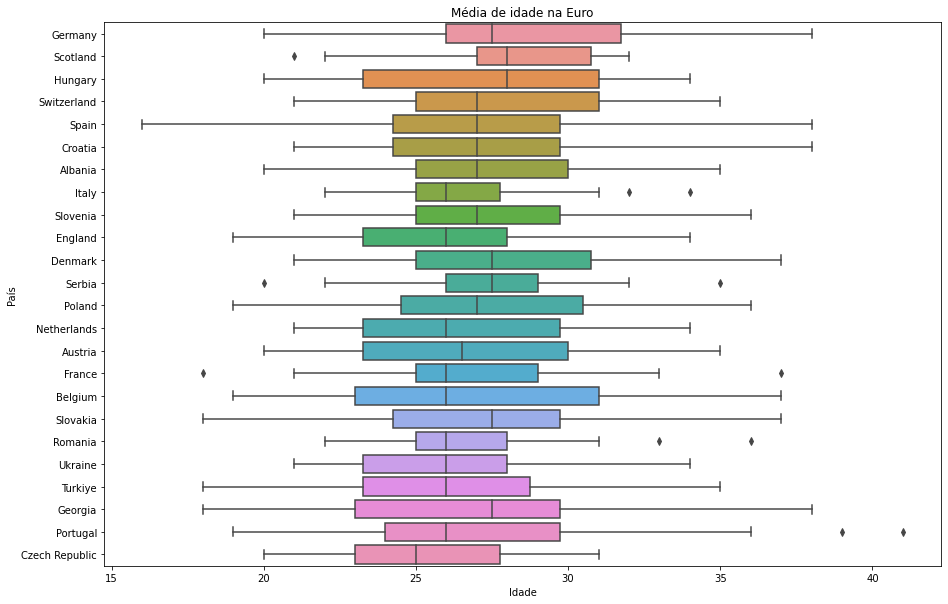

In [37]:
# Verificar a média de idade dos jogadores na Euro

plt.figure(figsize=(15,10))
plt.title('Média de idade na Euro')

sns.boxplot(data=df, x='Idade', y='País');

In [38]:
# renomear os paises

países ={
    "Germany":"Alemanha",
    "Scotland":"Escócia",
    "Hungary":"Hungria",
    "Switzerland":"Suíça",
    "Spain":"Espanha",
    "Croatia":"Croácia",
    "Albania":"Albânia",
    "Italy":"Itália",
    "Slovenia":"Eslovênia",
    "England":"Inglaterra",
    "Denmark":"Dinamarca",
    "Serbia":"Sérvia",
    "Poland":"Polônia",
    "Netherlands":"Holanda",
    "Austria":"Áustria",
    "France":"França",
    "Belgium":"Bélgica",
    "Slovakia":"Eslováquia",
    "Romania":"Romênia",
    "Ulkraine":"Ucrânia",
    "Turkiye":"Turquia",
    "Georgia":"Geórgia",
    "Portugal":"Portugal",
    "Czech Republic":"Republica Tcheca"
}

df['País'].map(países).head()

0    Alemanha
1    Alemanha
2    Alemanha
3    Alemanha
4    Alemanha
Name: País, dtype: object

In [39]:
#Mostrar a lista de países removendo os duplicados.
df['País'].drop_duplicates()

0             Germany
26           Scotland
52            Hungary
78        Switzerland
104             Spain
130           Croatia
156           Albania
182             Italy
208          Slovenia
234           England
260           Denmark
286            Serbia
312            Poland
339       Netherlands
365           Austria
391            France
416           Belgium
441          Slovakia
467           Romania
493           Ukraine
519           Turkiye
545           Georgia
571          Portugal
597    Czech Republic
Name: País, dtype: object